### 경마 데이터 탐색
참고자료 : https://github.com/mjs1995/Contest_Horse/blob/master/02_%EA%B2%BD%EB%A7%88_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89.ipynb


In [36]:
# !pip install missingno

작업에 사용할 모듈 불러오기

In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

작업에 사용할 csv 파일 불러오기

In [38]:
df = pd.read_csv("../../data/csv 파일/서울경마_3년_2_날짜.csv", encoding='ms949')
df.head()

,id,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,...,4코너,G-3F,G-1F,경주기록,날짜,날씨,주로상태,주로습도,등급,거리
0,1,1,8,일마레,한,수,3,55.5,먼로,서범석,...,00:48.3,00:37.6,00:13.2,01:19.8,2019년04월27일(토),맑음,포화,0.17,국5,1300
1,2,2,6,천하여제,한,암,3,53.0,문세영,지용철,...,00:48.2,00:38.1,00:13.5,01:20.2,2019년04월27일(토),맑음,포화,0.17,국6,1300
2,3,3,4,백두거포,한,거,3,55.0,마누엘,구자흥,...,00:49.0,00:38.0,00:13.3,01:20.8,2019년04월27일(토),맑음,포화,0.17,국6,1300
3,4,4,12,쏘아라흑장군,한,수,3,55.0,이준철,김대근,...,00:49.5,00:38.0,00:13.4,01:21.2,2019년04월27일(토),맑음,포화,0.17,국6,1300
4,5,5,11,퍼스트선더,한,수,4,55.0,김정준,심승태,...,00:49.5,00:38.0,00:13.3,01:21.2,2019년04월27일(토),맑음,포화,0.17,국6,1300


DataFrame에 대한 정보 출력
- 각 열의 데이터 타입 (dtype)과 non-null 값의 개수 확인
- DataFrame이 사용하는 전체 메모리 양 확인

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28121 entries, 0 to 28120
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28121 non-null  int64  
 1   순위      28121 non-null  int64  
 2   마번      28121 non-null  int64  
 3   마명      28121 non-null  object 
 4   산지      28121 non-null  object 
 5   성별      28121 non-null  object 
 6   연령      28121 non-null  int64  
 7   중량      28121 non-null  float64
 8   기수명     28121 non-null  object 
 9   조교사명    28121 non-null  object 
 10  마주명     28119 non-null  object 
 11  마체중     28121 non-null  int64  
 12  단승      28121 non-null  float64
 13  연승      28121 non-null  float64
 14  장구현황    22465 non-null  object 
 15  구간별순위   28121 non-null  object 
 16  S-1F    28121 non-null  object 
 17  1코너     28121 non-null  object 
 18  2코너     28121 non-null  object 
 19  3코너     28121 non-null  object 
 20  4코너     28121 non-null  object 
 21  G-3F    28121 non-null  object 
 22

DataFrame의 결측치를 시각화.
- matrix : 행렬 모양의 시각화 생성
- 결측치인 부분은 하얀색으로 표시
- 차트에서는 장구현황이 결측치가 많은 것으로 판단.

<Axes: >

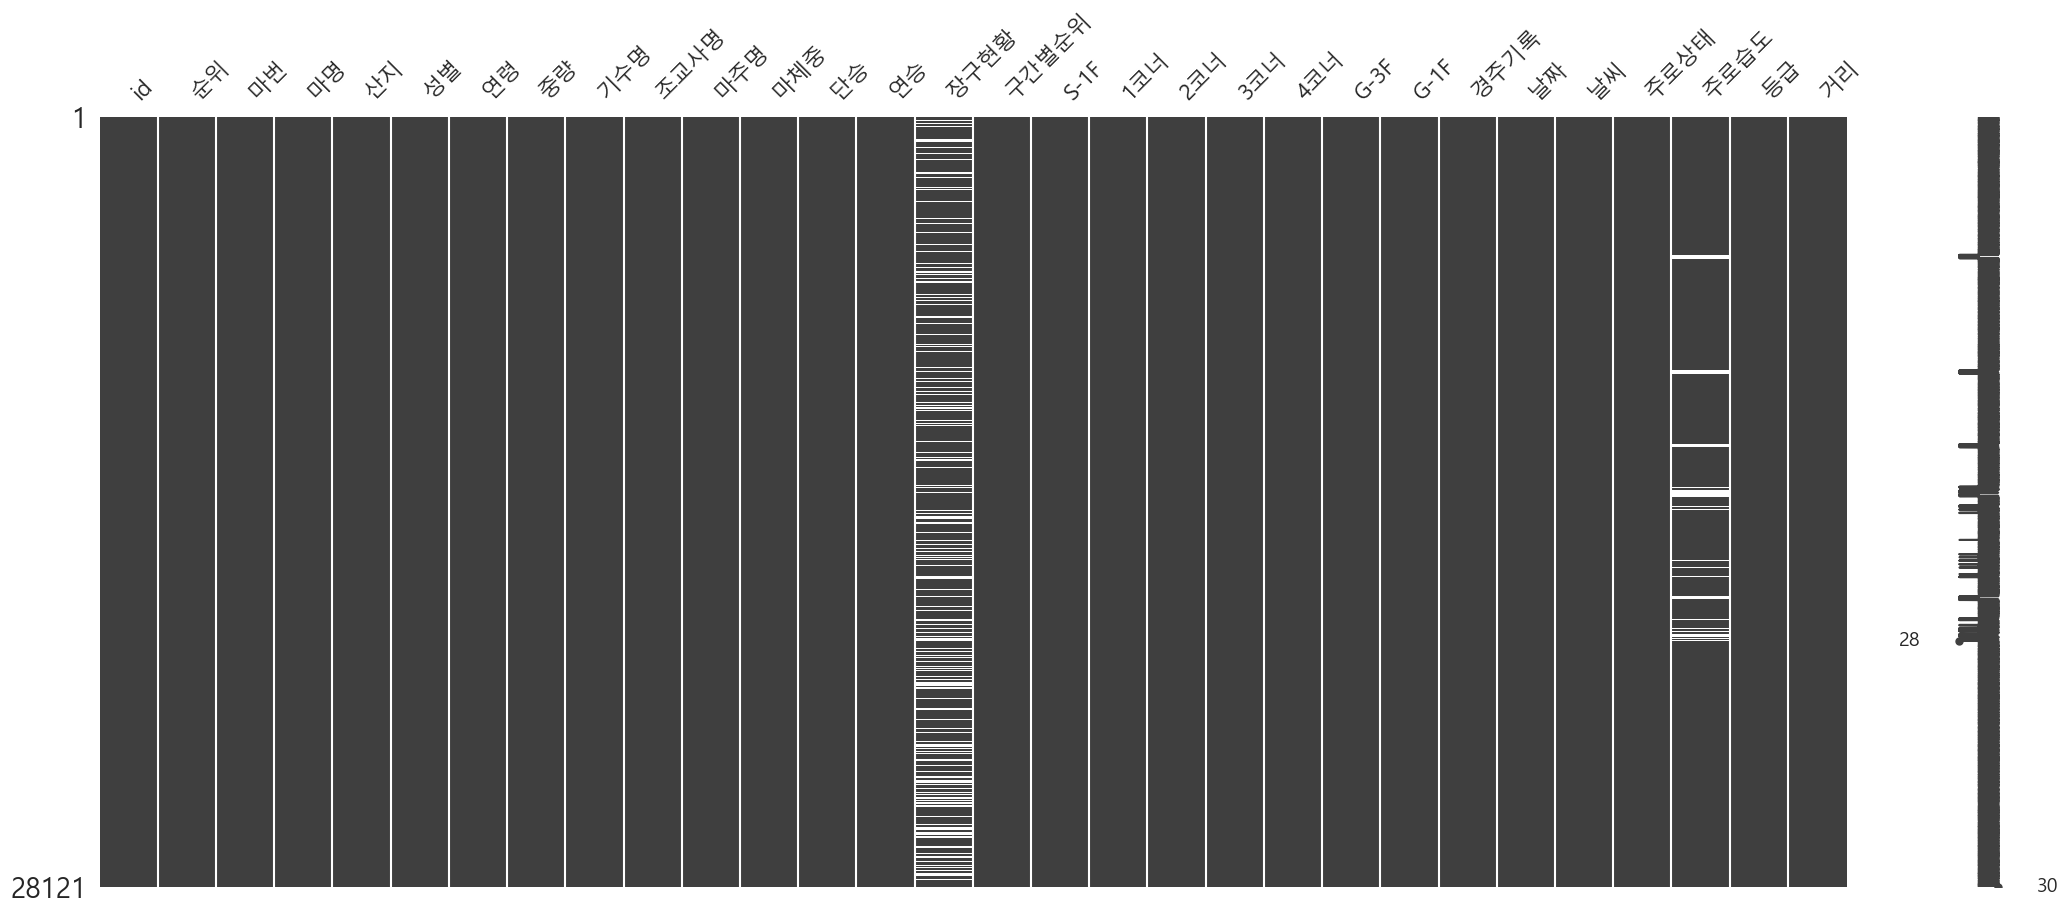

In [40]:
msno.matrix(df)

결측치의 개수를 계산.
- isnull() : 결측치인 경우 True 반환
- sum() : True (결측치)의 개수 합계 계산

In [41]:
df.isnull().sum()

id          0
순위          0
마번          0
마명          0
산지          0
성별          0
연령          0
중량          0
기수명         0
조교사명        0
마주명         2
마체중         0
단승          0
연승          0
장구현황     5656
구간별순위       0
S-1F        0
1코너         0
2코너         0
3코너         0
4코너         0
G-3F        0
G-1F        0
경주기록        0
날짜          0
날씨          0
주로상태        0
주로습도     1293
등급          0
거리          0
dtype: int64

항목의 값의 빈도를 출력 후, 빈도 값에 따른 Count Plot을 생성하여 시각화 적용
- DataFrame에서 값의 빈도 출력
- 시각화 설정
  - plot의 배경을 darkgrid로 설정
  - 한글 폰트 및 폰트 크기 설정
  - plot 크기 지정 (가로 15, 세로 5)
- Count Plot 생성
  - 색상은 magma 팔레트를 사용.
  - 빈도수에 따라 내림차순으로 정렬하여 plot에 표시
  - 다만 '마체중'은 x축 레이블을 숨김.

In [42]:
class CountPlotter:
    def __init__(self, df):
        self.df = df
        sns.set(style='darkgrid')
        plt.rcParams["font.family"] = 'Malgun Gothic'
        plt.rcParams["font.size"] = 15

    def plot_count(self, word):
        print(df[word].value_counts())
        plt.figure(figsize=(15,5))

        if word == '마체중':
            plt.tick_params(axis='x', labelsize=0)
            sns.countplot(data=df, x=word, hue=word, palette=sns.color_palette("magma", df[word].nunique()), legend=False)
        else:
            sns.countplot(data=df, x=word, hue=word, palette=sns.color_palette("magma", df[word].nunique()),
                        order = df[word].value_counts().index, legend=False)
    
    def make_count_value(self, word):
        self.plot_count(word)
        plt.show()

    def make_pivot_table_and_heatmap(self, word):
        df_p=self.df.pivot_table(index="순위",columns=word,aggfunc='size').fillna(0)
        plt.figure(figsize=(20,10))
        sns.heatmap(df_p, cmap="Blues", annot=(word!='마체중'), fmt = '.0f')
        
        
count_plotter = CountPlotter(df)

산지
한     21572
미      5763
호       589
일       113
뉴        37
캐        31
아일       14
영         1
프         1
Name: count, dtype: int64


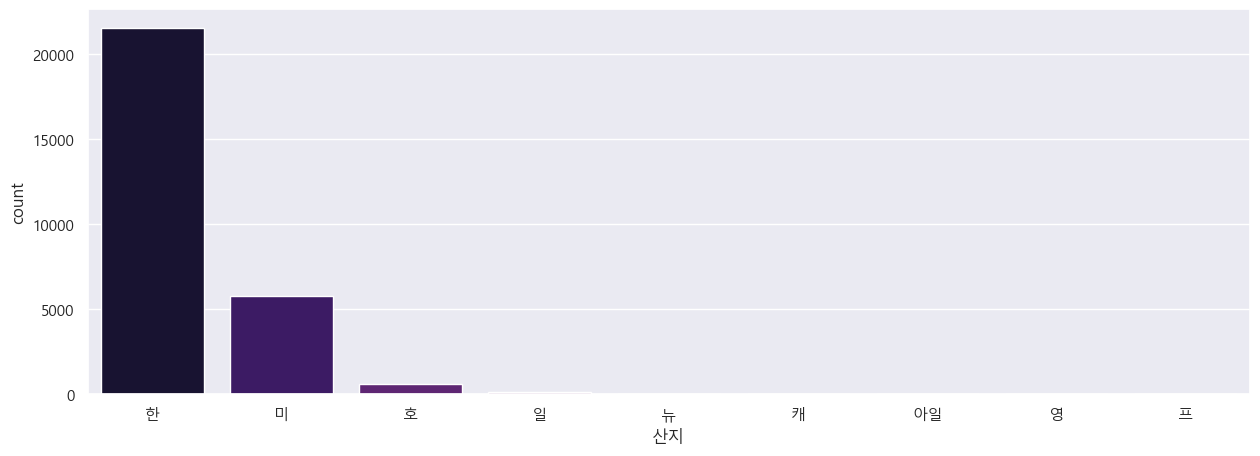

In [43]:
count_plotter.make_count_value('산지')

성별
암    10932
수    10266
거     6923
Name: count, dtype: int64


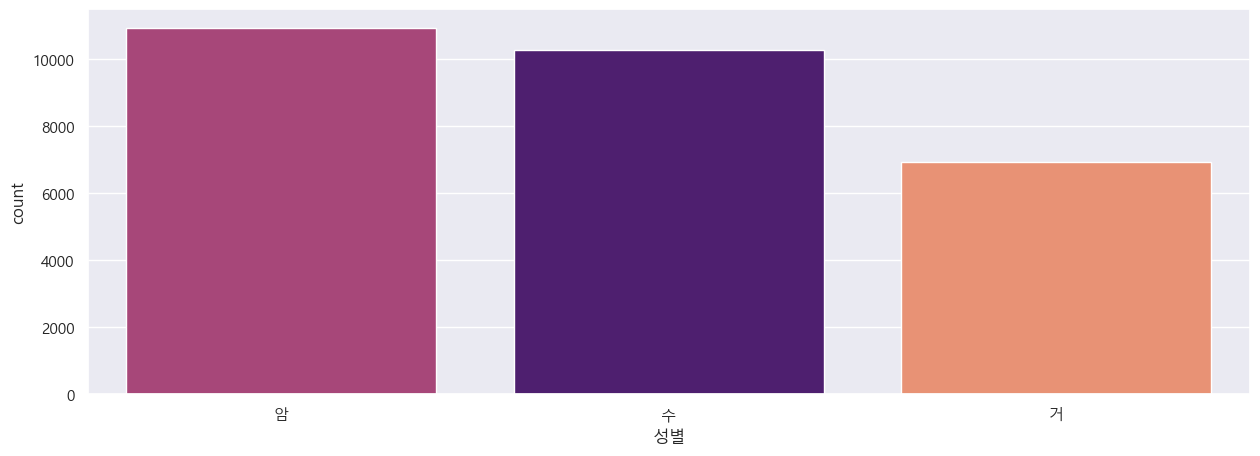

In [44]:
count_plotter.make_count_value('성별')

연령
3    11415
4     7886
5     4193
2     2556
6     1434
7      498
8      118
9       21
Name: count, dtype: int64


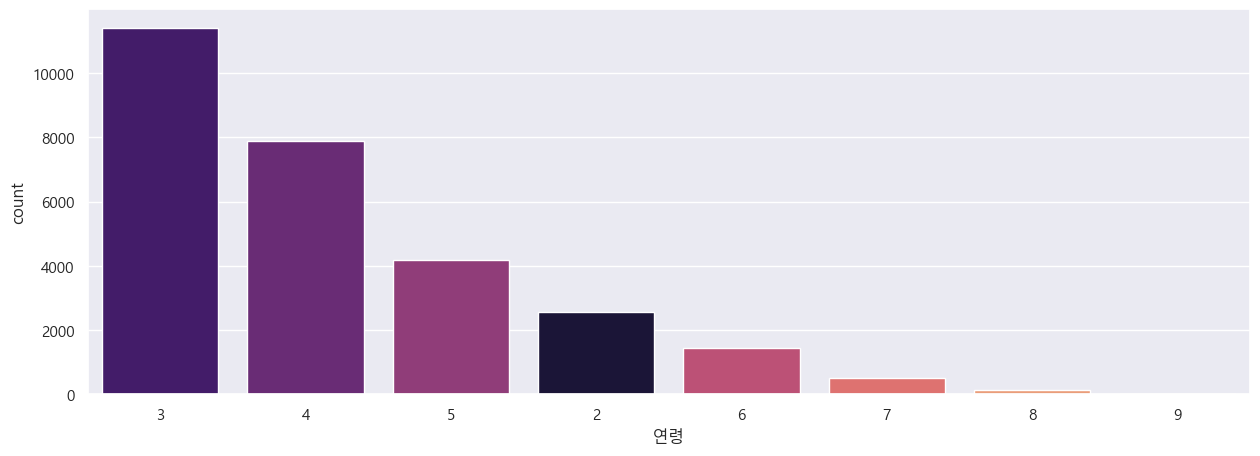

In [45]:
count_plotter.make_count_value('연령')

중량
52.0    5019
54.0    3548
55.0    3438
53.0    2970
51.0    2461
56.0    2353
53.5    1670
52.5    1585
54.5    1489
55.5    1118
57.0     856
56.5     775
51.5     584
58.0      83
50.0      63
57.5      61
59.0      20
50.5      12
58.5       9
60.0       4
59.5       3
Name: count, dtype: int64


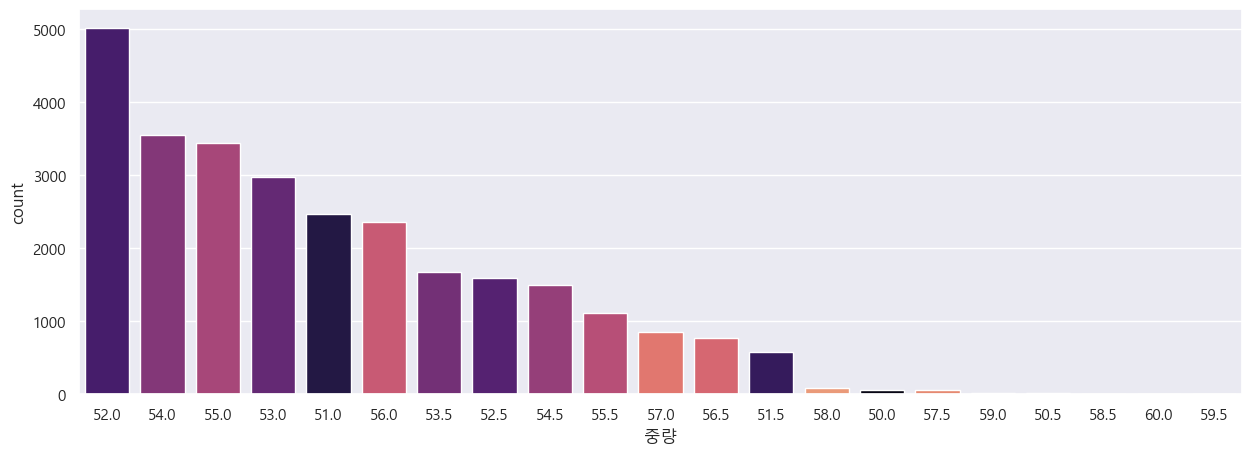

In [46]:
count_plotter.make_count_value('중량')

마체중
483    465
468    458
472    455
477    449
481    448
      ... 
573      1
568      1
556      1
389      1
617      1
Name: count, Length: 198, dtype: int64


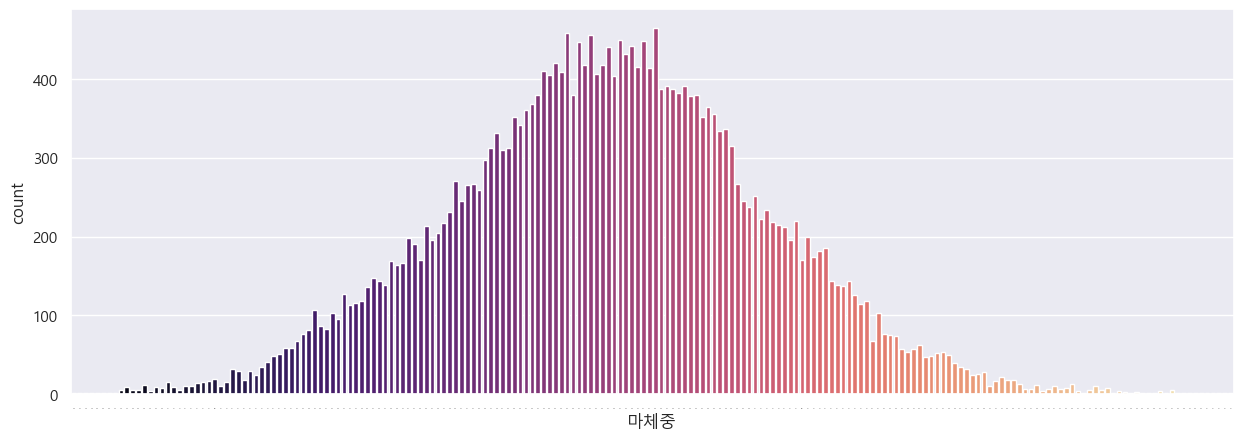

In [47]:
count_plotter.make_count_value('마체중')

등급
국5     6583
국4     5767
국6     3243
국3     3222
외4     2062
외3     1876
국2     1580
외1     1304
외2     1297
국1     1177
외미검      10
Name: count, dtype: int64


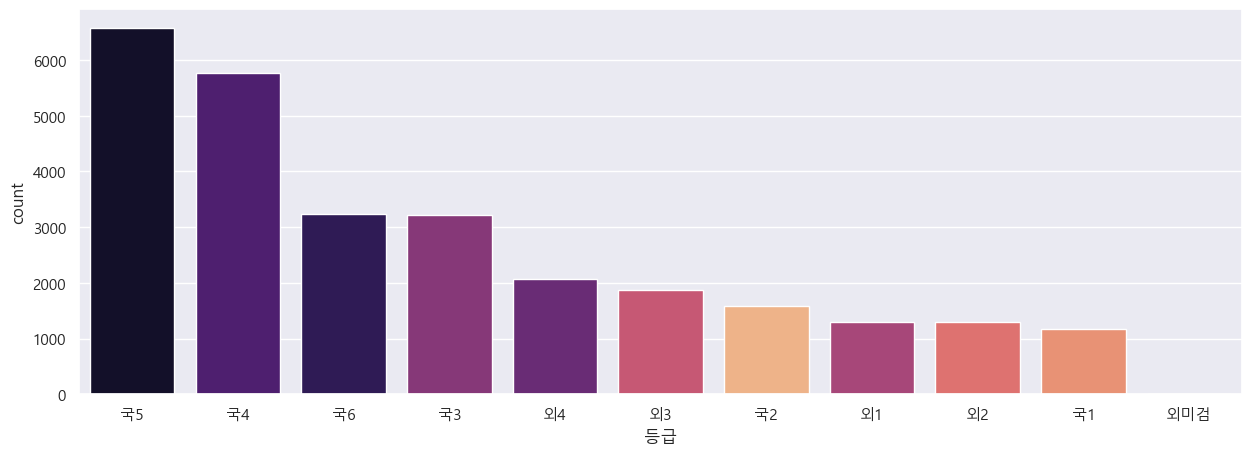

In [48]:
count_plotter.make_count_value('등급')

거리
1300    7841
1000    6634
1200    5149
1700    4201
1400    2127
1800    1481
2000     368
1900     263
2300      57
Name: count, dtype: int64


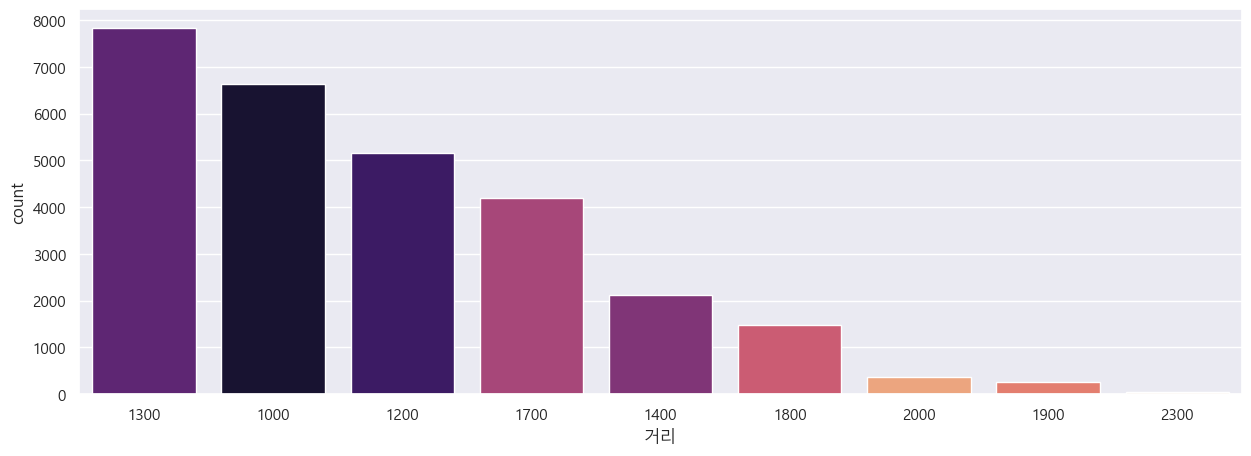

In [49]:
count_plotter.make_count_value('거리')

DataFrame의 Pivot Table을 생성 후 '순위'와 항목에 따른 빈도를 HeatMap으로 시각화하기

- pivot table 생성
  - '순위'를 행 index
  - 선택한 그룹을 열 index
  - 각 그룹의 빈도(size)를 나타내도록 설정
- 결측치 값을 0으로 대체
- HeatMap 생성
  - HeatMap 크기 지정 (가로 20 세로 10)
  - 생성한 pivot table 사용
  - HeatMap 색상을 Blue로 설정
  - 각 셀에 숫자를 표시
  - 숫자를 소수점 이하 0자리까지 표시

  - '마체중'일 경우 각 셀에 숫자를 표시하지 않음 => 데이터가 많기 때문에 생략
- 한글 폰트 설정 및 크기 설정 

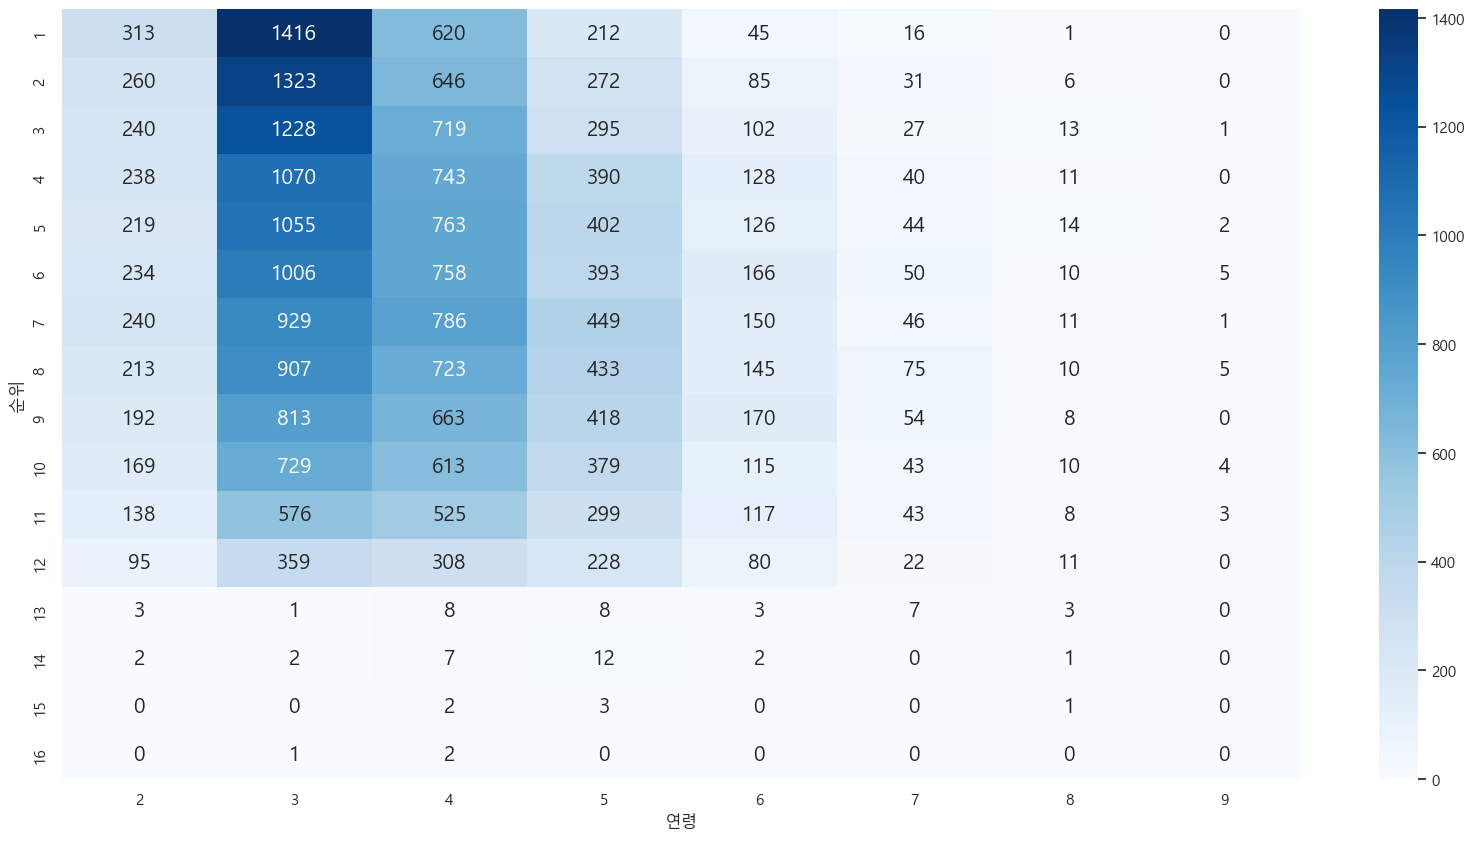

In [50]:
count_plotter.make_pivot_table_and_heatmap('연령')

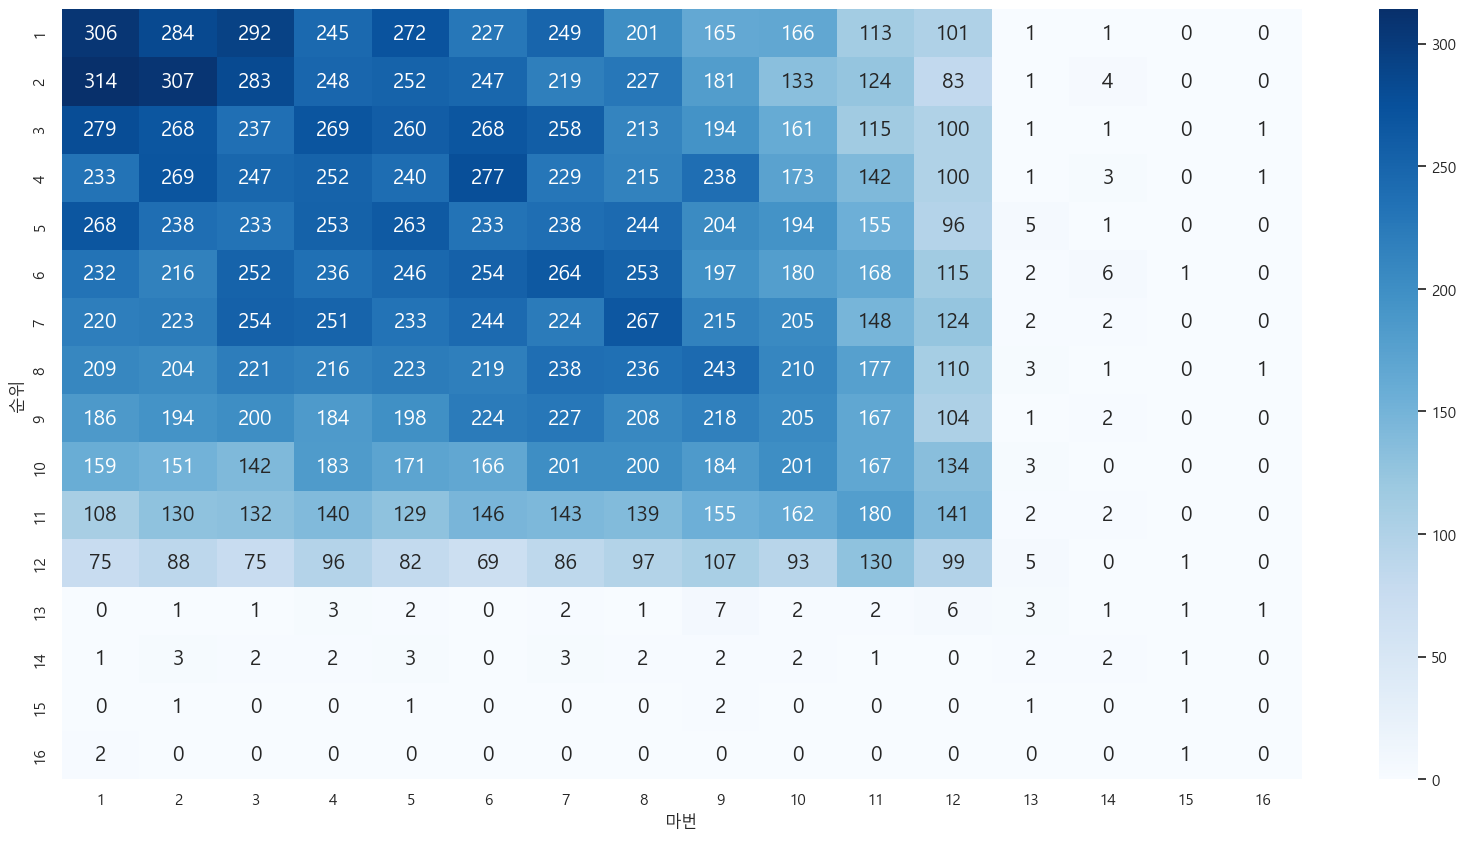

In [51]:
count_plotter.make_pivot_table_and_heatmap('마번')

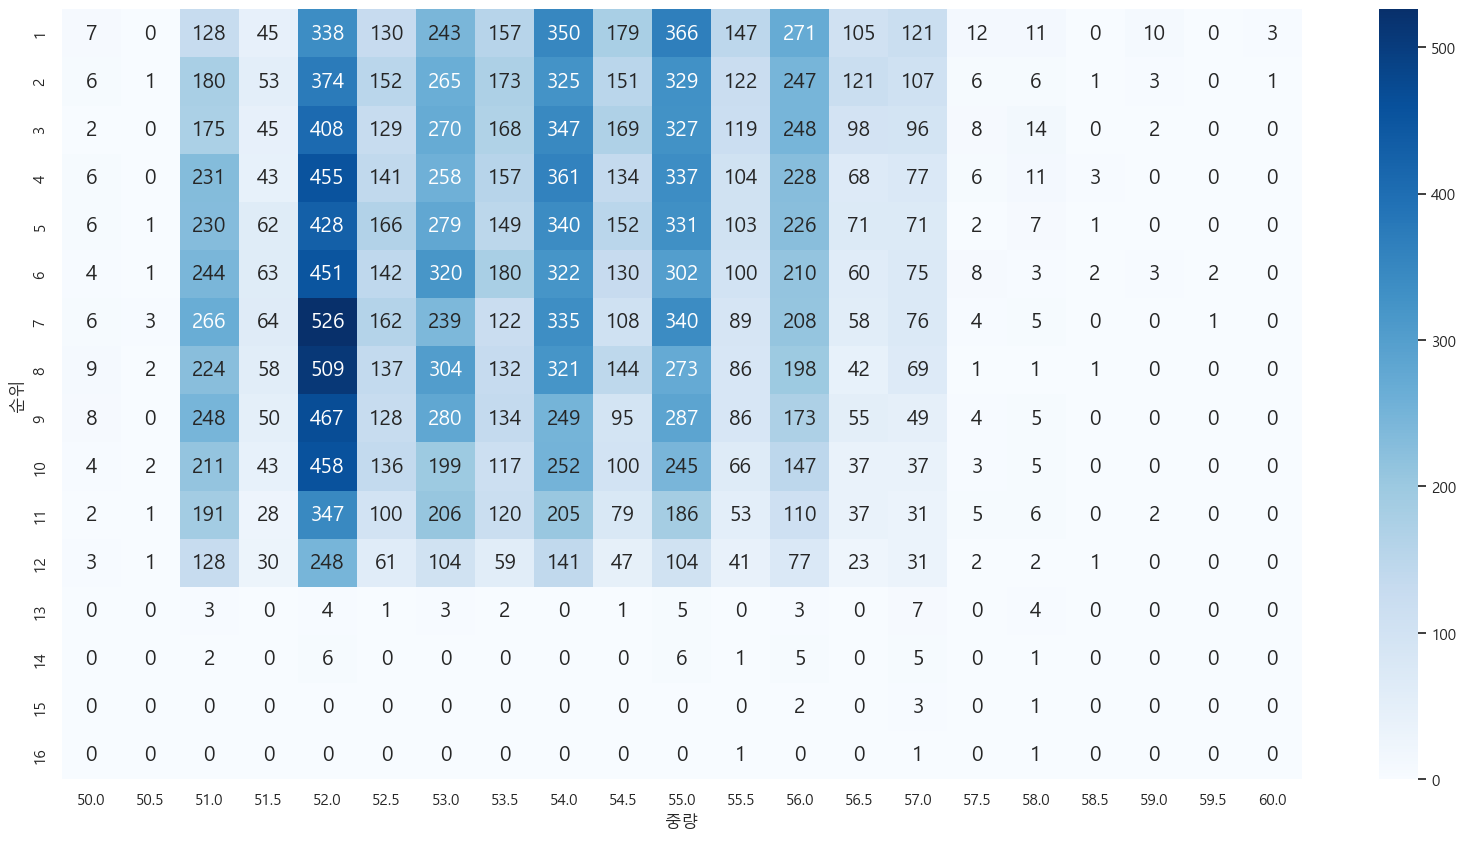

In [52]:
count_plotter.make_pivot_table_and_heatmap('중량')

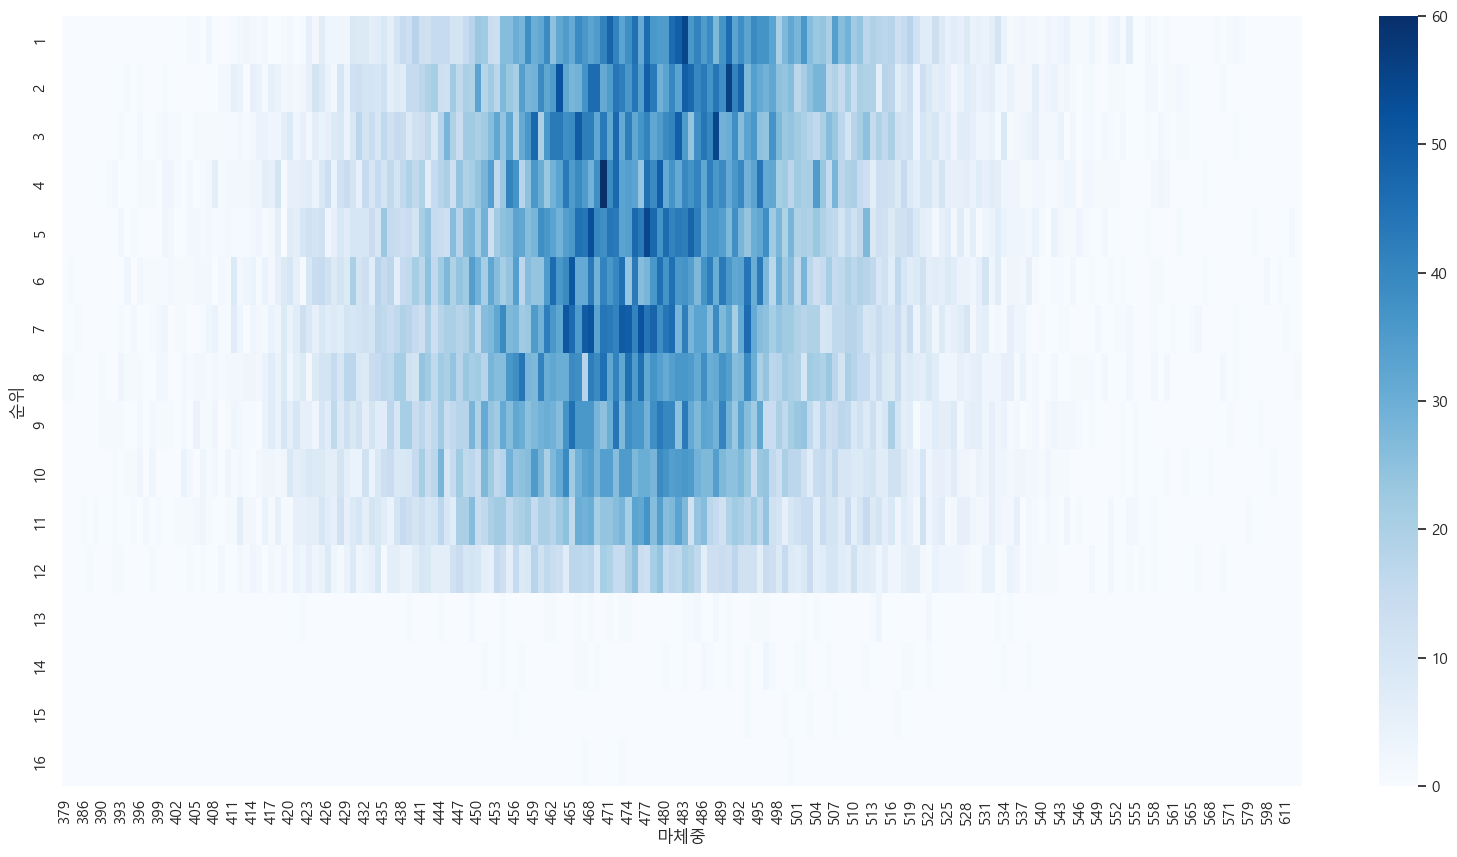

In [53]:
count_plotter.make_pivot_table_and_heatmap('마체중')

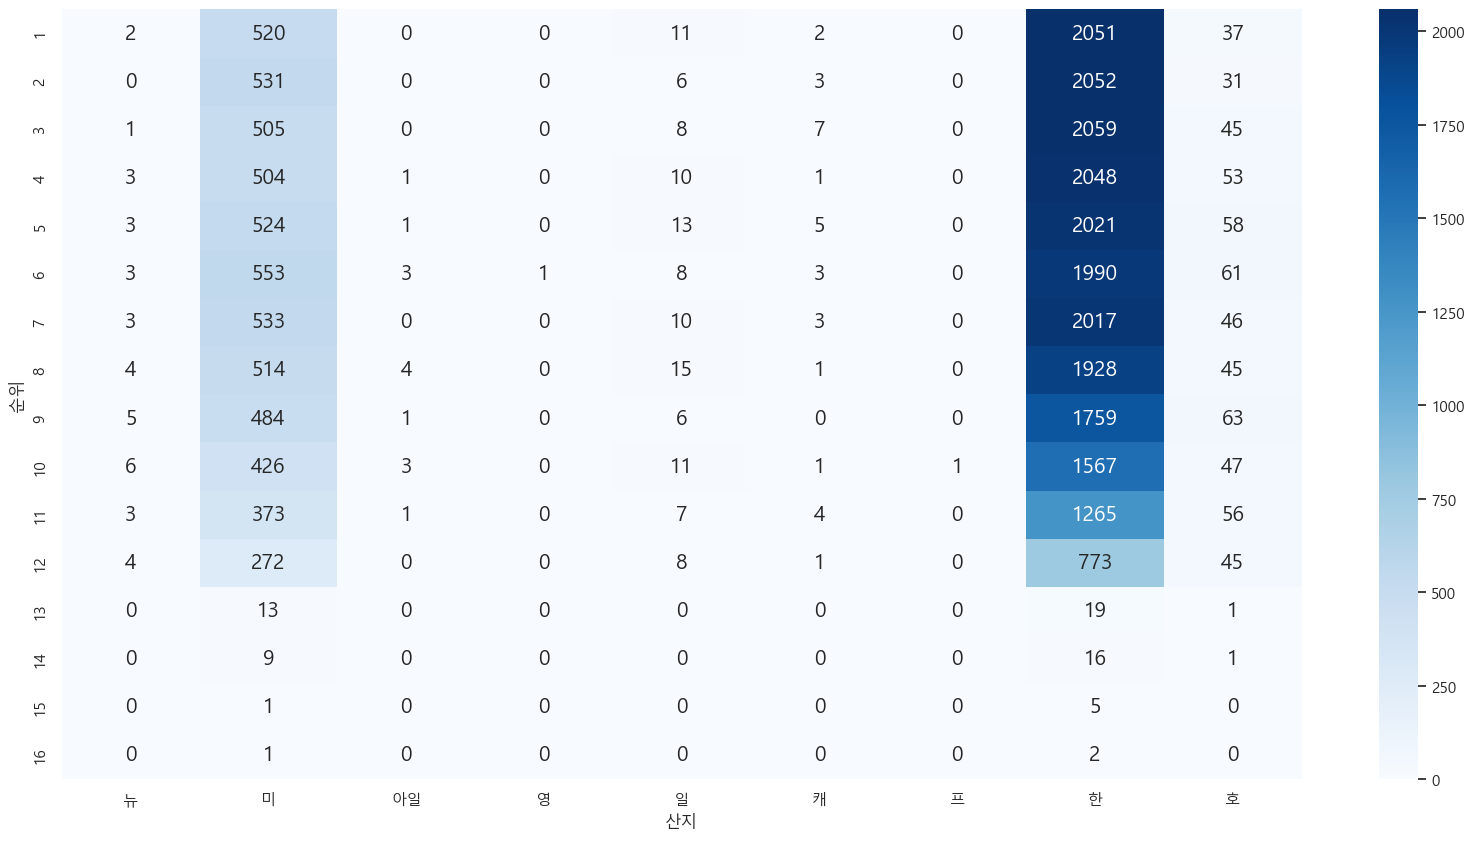

In [54]:
count_plotter.make_pivot_table_and_heatmap('산지')

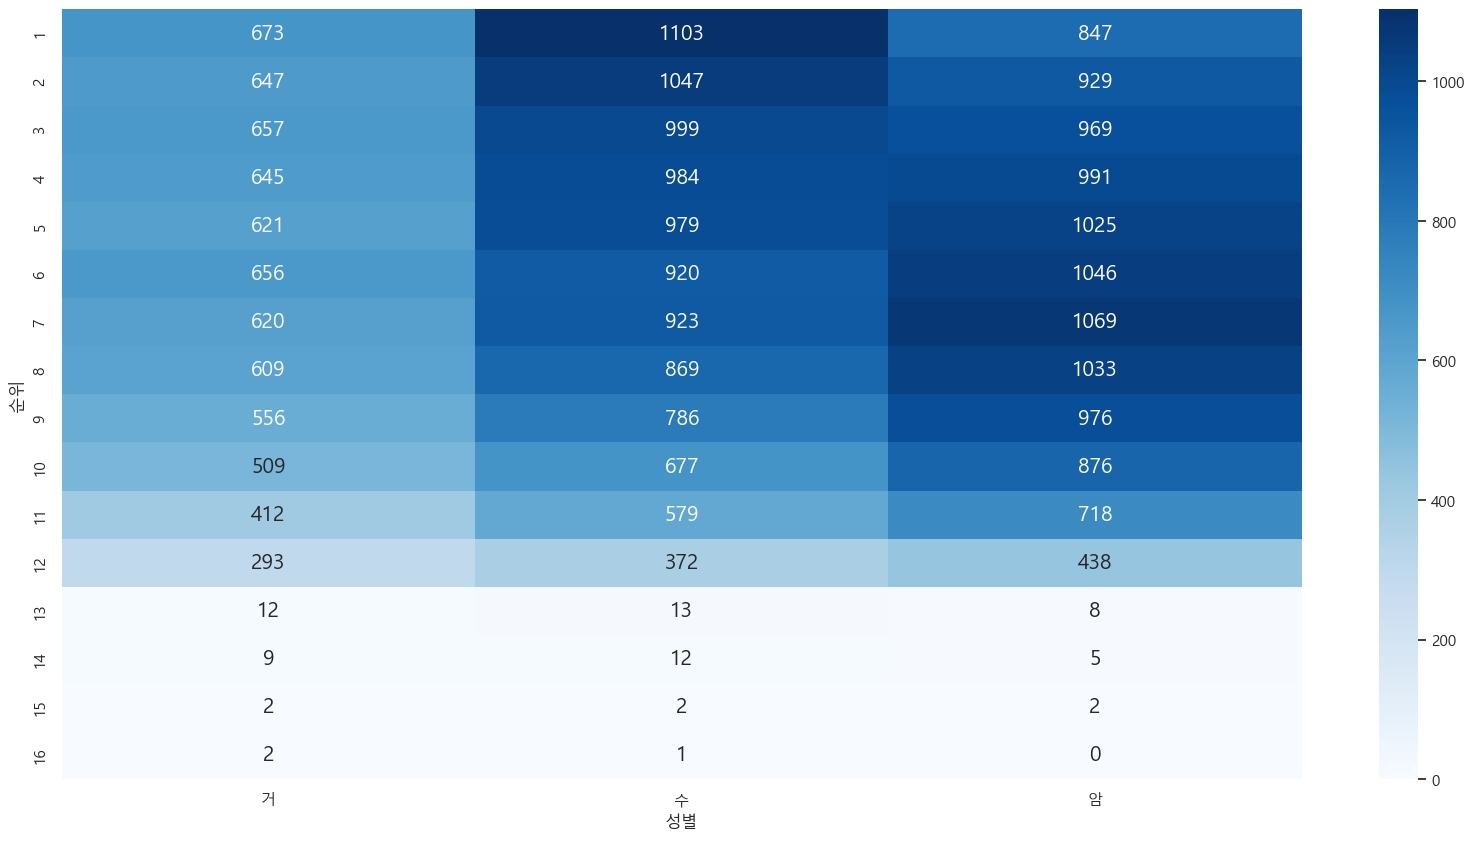

In [55]:
count_plotter.make_pivot_table_and_heatmap('성별')

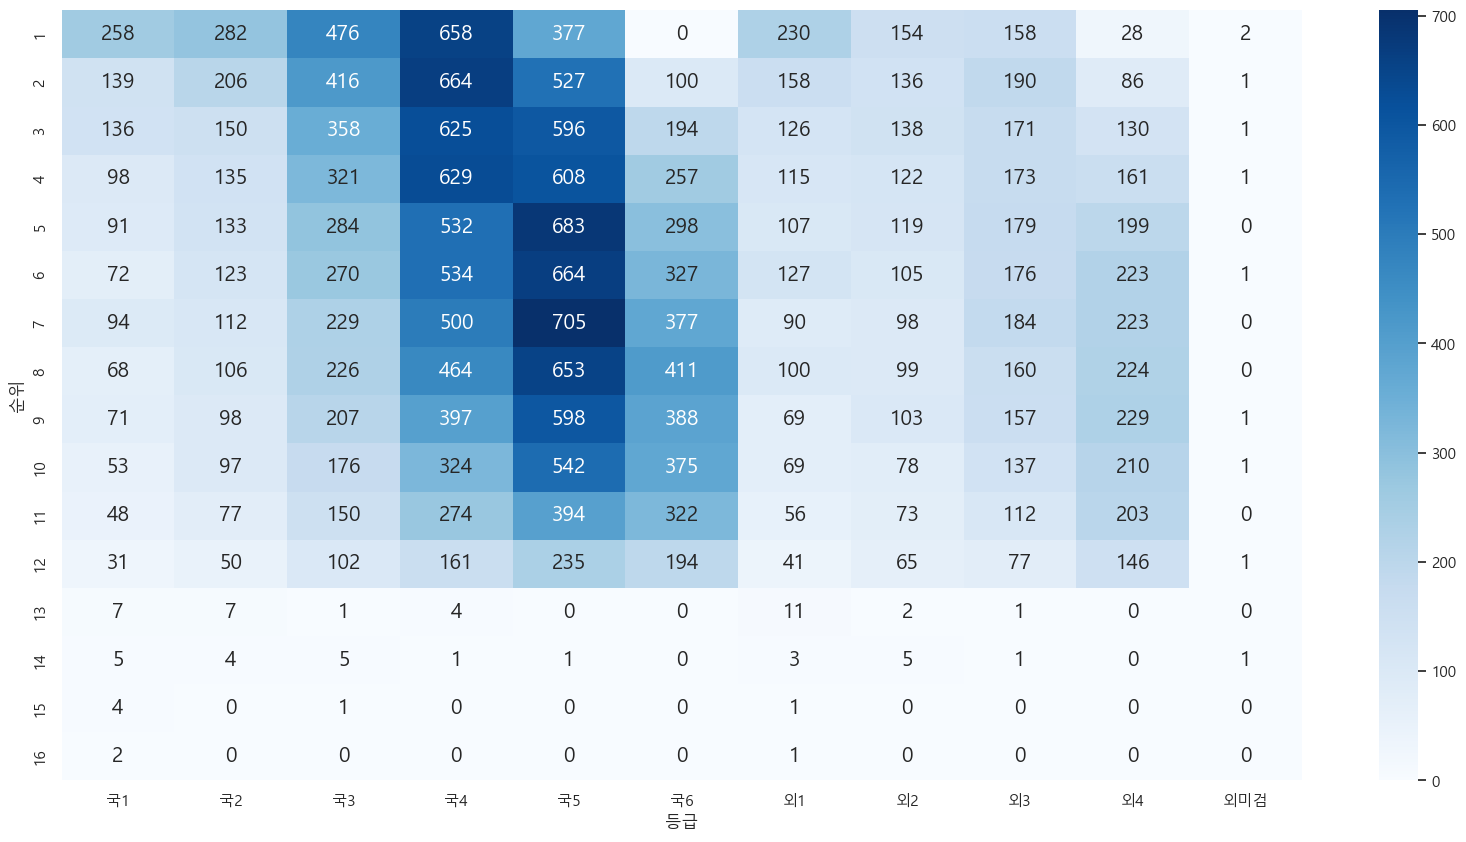

In [56]:
count_plotter.make_pivot_table_and_heatmap('등급')

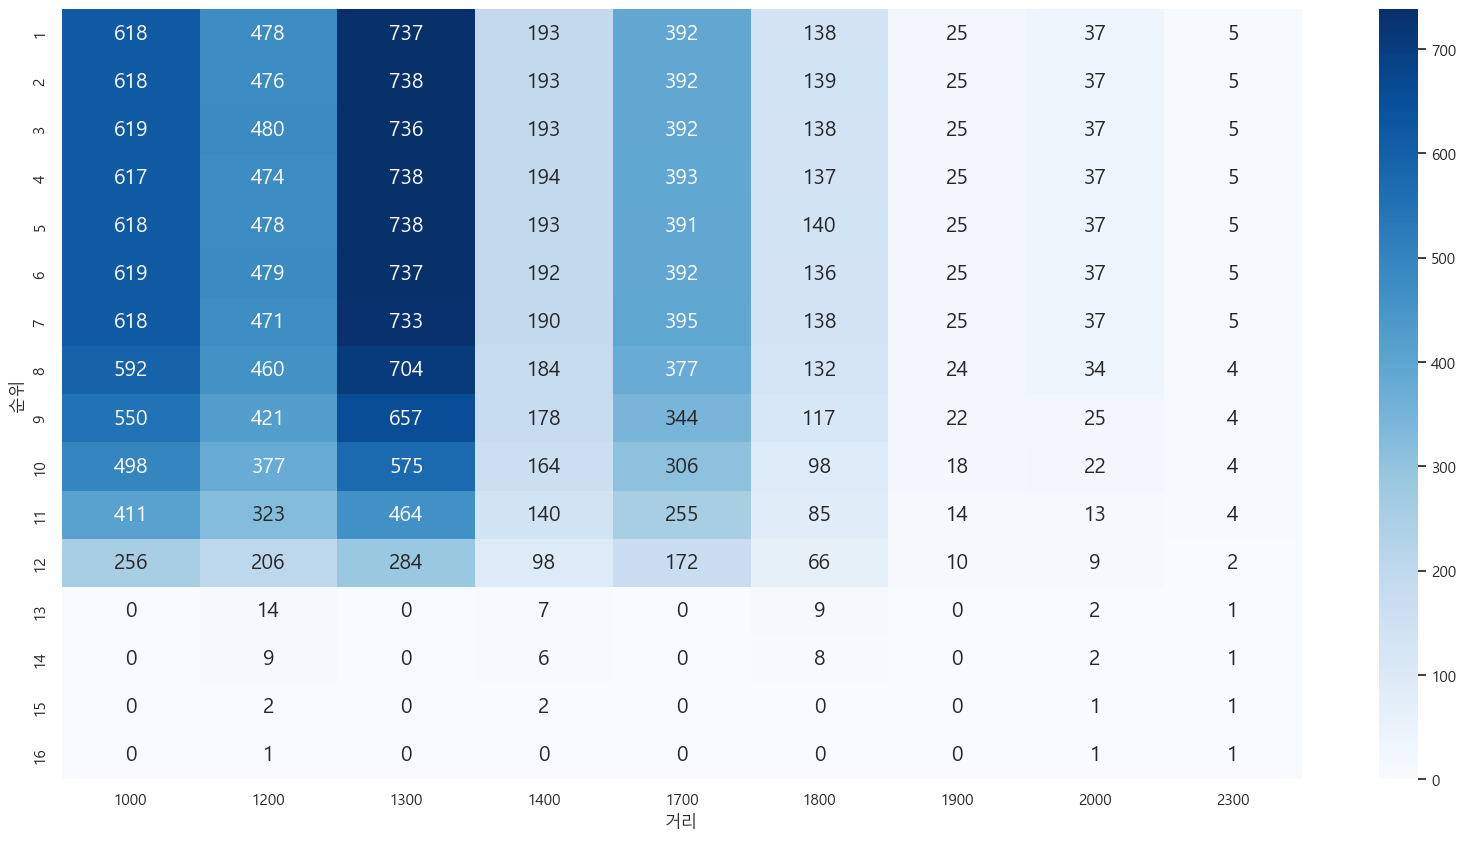

In [57]:
count_plotter.make_pivot_table_and_heatmap('거리')

Kmeans 클러스터링 모듈 불러오기

In [58]:
from sklearn.cluster import KMeans

k-means 클러스터링 수행 및 결과 시각화
- 2개의 특성으로 DataFrame으로 만든다.
- kmeans : 클러스터 개수 설정
- kmeans 알고리즘을 적합
- labels : 각 데이터 포인트의 클러스터 레이블
- centers : 클러스터 중심의 좌표
- 데이터 포인트 및 중심 시각화


In [59]:
class KmeansClustering:
    def __init__(self, df):
        self.df = df

    def kmeans_clustering(self, arg1, arg2):
        data = self.df[[arg1, arg2]]
        kmeans = KMeans(n_clusters=4, n_init=10)
        kmeans.fit(data)

        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        plt.scatter(data[arg1], data[arg2], c=labels, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red')
        plt.xlabel(arg1)
        plt.ylabel(arg2)
        plt.title('k-means 클러스터링 결과')
        plt.show()

kmeans_cluster = KmeansClustering(df)

In [60]:
def kmeans_clustering(arg1, arg2):
    data = df[[arg1, arg2]]
    kmeans = KMeans(n_clusters=4, n_init=10)
    kmeans.fit(data)

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    plt.scatter(data[arg1], data[arg2], c=labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red')
    plt.xlabel(arg1)
    plt.ylabel(arg2)
    plt.title('k-means 클러스터링 결과')
    plt.show()

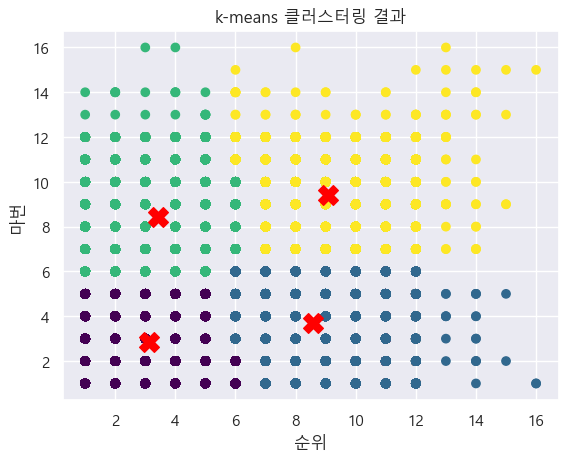

In [61]:
kmeans_cluster.kmeans_clustering('순위', '마번')